Import Data

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

Additional Settings

In [110]:
%matplotlib inline
import numpy as np
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df_raw = df_raw[(df_raw.rssdid!=1456501) & (df_raw.bhcid!=2380443)] #removing Goldman Sachs and Morgan Stanley


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.style.use('bmh')


plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

Leverage Ratio: L = Assets/Equity (Commercial banks aggregated by bhc)

In [111]:
df = df_raw[["name", "bhcid", "rssdid","assets",'year', "quarter", "equity"]]
df = df[df.quarter==4]


df_indBanks = df[df.bhcid == 0]


df = df[df.bhcid != 0]
df = df.groupby(["bhcid","year"]).agg({"assets":"sum",
                                  "equity":"sum"})

df["leverageRatio"] = df.assets/df.equity
#df
df.index.names = ["rssdid", "year"]
df_indBanks["leverageRatio"] = df_indBanks.assets/df_indBanks.equity
df_indBanks.set_index([df_indBanks.rssdid, df_indBanks.year], inplace=True)
df_indBanks = df_indBanks[["rssdid","bhcid", "year", "assets", "equity", "leverageRatio"]]
df_indBanks.drop(["rssdid", "bhcid", "year"], axis=1, inplace=True)
#df
df_all = pd.concat([df, df_indBanks])

print(df)

print(df_indBanks)

print(df_all)
#fig, ax = plt.subplot()
#ax.plot()

                     assets    equity  leverageRatio
rssdid    year                                      
128146.0  1976.0    11559.0    1049.0      11.019066
          1977.0    14624.0    1177.0      12.424809
          1978.0    15926.0    1255.0      12.690040
          1979.0    17770.0    1341.0      13.251305
          1980.0    18864.0    1413.0      13.350318
...                     ...       ...            ...
4534101.0 2013.0   145922.0   15876.0       9.191358
4552356.0 2013.0    89248.0   10119.0       8.819844
4553960.0 2013.0   412436.0   43104.0       9.568393
4556381.0 2013.0   123832.0   14899.0       8.311430
4558901.0 2013.0  1323371.0  121814.0      10.863866

[180653 rows x 3 columns]
                    assets    equity  leverageRatio
rssdid    year                                     
28.0      1986.0    5742.0    1956.0       2.935583
          1987.0   11844.0    1966.0       6.024415
          1988.0   18221.0    2000.0       9.110500
          1989.0   23312

Clean data of inf values

In [112]:


df_all.leverageRatio.replace([np.inf, -np.inf], np.nan, inplace=True)
df_all.dropna(how="all", subset=["leverageRatio"],inplace=True)
df_all.leverageRatio.describe()
#print(df_all[df_all.leverageRatio > 200])
df_all = df_all[df_all.leverageRatio>0] #removing all negativ leverageRatios
df_all

assets    equity  leverageRatio
rssdid    year                                     
128146.0  1976.0   11559.0    1049.0      11.019066
          1977.0   14624.0    1177.0      12.424809
          1978.0   15926.0    1255.0      12.690040
          1979.0   17770.0    1341.0      13.251305
          1980.0   18864.0    1413.0      13.350318
...                    ...       ...            ...
4262543.0 2011.0  854235.0  172534.0       4.951111
          2012.0  777842.0  173092.0       4.493807
          2013.0  808999.0  168617.0       4.797850
4536084.0 2013.0   35356.0   15989.0       2.211270
4589857.0 2013.0  270022.0  239316.0       1.128307

[325262 rows x 3 columns]

Illustrate data

count    325262.000000
mean         12.195638
std          55.154029
min           1.000000
25%           9.267636
50%          11.296237
75%          13.320763
max       14698.600000
Name: leverageRatio, dtype: float64


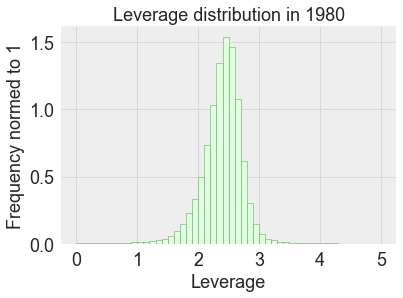

In [113]:
df_all_new = df_all.reset_index(level="year")
print(df_all_new.leverageRatio.describe())
df_all_new[df_all_new.year==1980]
df_test_data = df_all_new.copy()
df_test_data.leverageRatio = np.log(df_test_data.leverageRatio)
#fig, ax = plt.subplots()
#plt.xticks(bins, rotation=60)
ax = plt.gca()
ax.set_title("Leverage distribution in 1980")
ax.set_ylabel("Frequency normed to 1")
ax.set_xlabel("Leverage")
n, bins, patches = plt.hist(df_test_data.leverageRatio, bins=50, range=(0,5), density=True, edgecolor="#6A9662",color="#DDFFDD")
#df_test_data.hist(column="leverageRatio", grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
#ax1 = plt.gca()

(array([5.00471961e-03, 7.31804071e-03, 1.98394519e-02, 1.25380722e-01,
        8.05170312e-01, 1.03579753e+00, 7.03480305e-02, 8.83675844e-03,
        3.20404584e-03, 1.47386109e-03, 7.17706269e-04, 5.25463518e-04,
        3.01180309e-04, 1.40978017e-04, 8.33051919e-05, 4.48566418e-05,
        4.48566418e-05, 4.48566418e-05, 6.40809169e-06, 2.56323667e-05]),
 array([0.        , 0.47977538, 0.95955075, 1.43932613, 1.91910151,
        2.39887688, 2.87865226, 3.35842764, 3.83820301, 4.31797839,
        4.79775377, 5.27752914, 5.75730452, 6.23707989, 6.71685527,
        7.19663065, 7.67640602, 8.1561814 , 8.63595678, 9.11573215,
        9.59550753]),
 <a list of 20 Patch objects>)

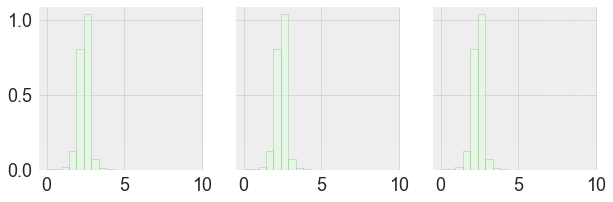

In [114]:

fig, ax = plt.subplots(1,3, sharex='col', sharey='row', figsize=(10, 3))
#plt.xticks(bins, rotation=60)
#ax.set_title("Leverage distribution in 1980")
#ax.set_ylabel("Frequency normed to 1")
#ax.set_ylabel("Leverage")
ax[0].hist(df_test_data.leverageRatio,bins=20 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
ax[1].hist(df_test_data.leverageRatio,bins=20 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
ax[2].hist(df_test_data.leverageRatio,bins=20 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
#n, bins, patches = plt.hist(df_test_data.leverageRatio, bins=20, density=True, edgecolor="#6A9662",color="#DDFFDD")
#df_test_data.hist(column="leverageRatio", grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
#ax1 = plt.gca()

In [115]:
df = df_all.reset_index(level="year")
df.leverageRatio.describe()

print(df[df.leverageRatio>50])

             year    assets  equity  leverageRatio
rssdid                                            
1020368.0  1977.0  139106.0  2720.0      51.141912
1020872.0  1985.0   14045.0   276.0      50.887681
1020872.0  1986.0   14066.0    81.0     173.654321
1021806.0  1990.0   48733.0   692.0      70.423410
1021806.0  1991.0   37684.0   696.0      54.143678
...           ...       ...     ...            ...
3428258.0  2009.0  100651.0  1243.0      80.974256
3437081.0  2009.0   51095.0   889.0      57.474691
3448751.0  2011.0   95725.0  1882.0      50.863443
3564286.0  2013.0   63453.0   668.0      94.989521
4031208.0  2009.0  163907.0  1501.0     109.198534

[918 rows x 4 columns]


Histograms for every year for quarter 4. 

In [116]:
boxplot_df = df[(df.leverageRatio < 20) & (df.leverageRatio > 0)]

Q1 = df.leverageRatio.quantile(0.05)
Q3 = df.leverageRatio.quantile(0.95)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

x = df.leverageRatio

df_IQS = df[df.leverageRatio.between(df.leverageRatio.quantile(.15), df.leverageRatio.quantile(.85))]

df_IQS.leverageRatio.describe()

6.130119469659004
17.22420780380701
11.094088334148005


count    227682.000000
mean         11.295017
std           1.681576
min           8.130029
25%           9.939094
50%          11.296237
75%          12.643742
max          14.511350
Name: leverageRatio, dtype: float64

<class 'pandas.core.series.Series'>


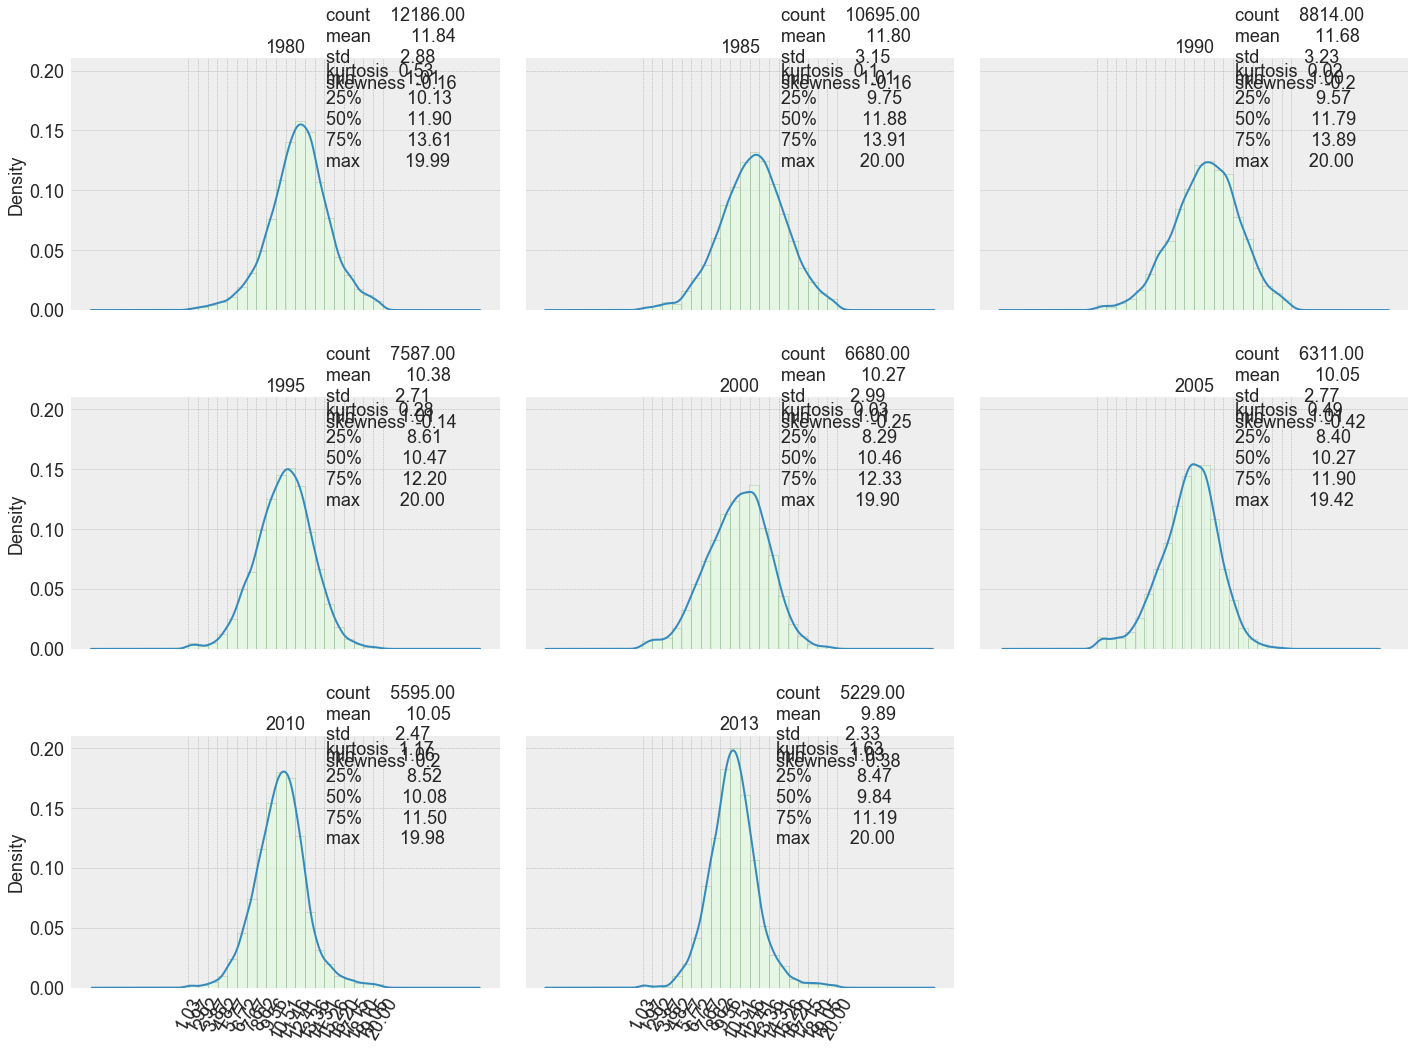

In [117]:
Q1 = df.leverageRatio.quantile(0.15)
Q3 = df.leverageRatio.quantile(0.85)
#print(df[df.leverageRatio>20])
#df = df[(df.leverageRatio > 0)]
#print(df)
fig, ax = plt.subplots(3, 3, figsize=(20,15), sharey=True, sharex=True)
ax = ax.ravel() 
year=1980
x = 0
temp_df = pd.DataFrame()
for x in range(7):
    temp_df = boxplot_df[boxplot_df.year==year]
    #print(temp_df)
    n, bins, patches = ax[x].hist(temp_df.leverageRatio, bins=20 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
    temp_df.leverageRatio.plot.kde(ax=ax[x])
    
    ax[x].set_title(year)
    ax[x].set(xticks=bins)
    ax[x].text(14.5,0.12,temp_df.leverageRatio.describe().round(2).to_string())
    
    skew_value = temp_df.leverageRatio.skew().round(2)
    skew_value = "skewness  " + str(skew_value)
    ax[x].text(14.5, 0.185, skew_value)
    
    kurtosis_value = temp_df.leverageRatio.kurtosis().round(2)
    kurtosis_value = "kurtosis  " + str(kurtosis_value)
    ax[x].text(14.5, 0.195, kurtosis_value)
    
    
    
    #ax[x].text(16.5,0.175, "Mean: " + str(round(temp_df.leverageRatio.mean(),2)))
    #ax[x].text(17,0.165, "Median: " + str(temp_df.leverageRatio.median()))
    for tick in ax[x].get_xticklabels():
        tick.set_rotation(60)
    #print(bins)
    #ax[x].set_xticklabels(bins, rotation=60)
    year = year + 5

year = year - 2
temp_df = boxplot_df[boxplot_df.year==year]
n, bins, patches = ax[7].hist(temp_df.leverageRatio, bins=20,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
temp_df.leverageRatio.plot.kde(ax=ax[7])
for tick in ax[7].get_xticklabels():
        tick.set_rotation(60)
ax[7].set_title(year)
#ax[1].text(1,1, temp_df.leverageRatio.mean())
ax[7].set(xticks=bins)
ax[7].text(14,0.12,temp_df.leverageRatio.describe().round(2).to_string())

skew_value = temp_df.leverageRatio.skew().round(2)
skew_value = "skewness  " + str(skew_value)
ax[7].text(14, 0.185, skew_value)
    
kurtosis_value = temp_df.leverageRatio.kurtosis().round(2)
kurtosis_value = "kurtosis  " + str(kurtosis_value)
ax[7].text(14, 0.195, kurtosis_value)
   

fig.delaxes(ax[8])
#fig.suptitle('Categorical Plotting')
#plt.subplots_adjust(left=0.1, bottom=0.02, right=0.75)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/LeverageDistribution_LeverageRatio_8013.png')
y = temp_df.leverageRatio.describe()
print(type(y))

In [118]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

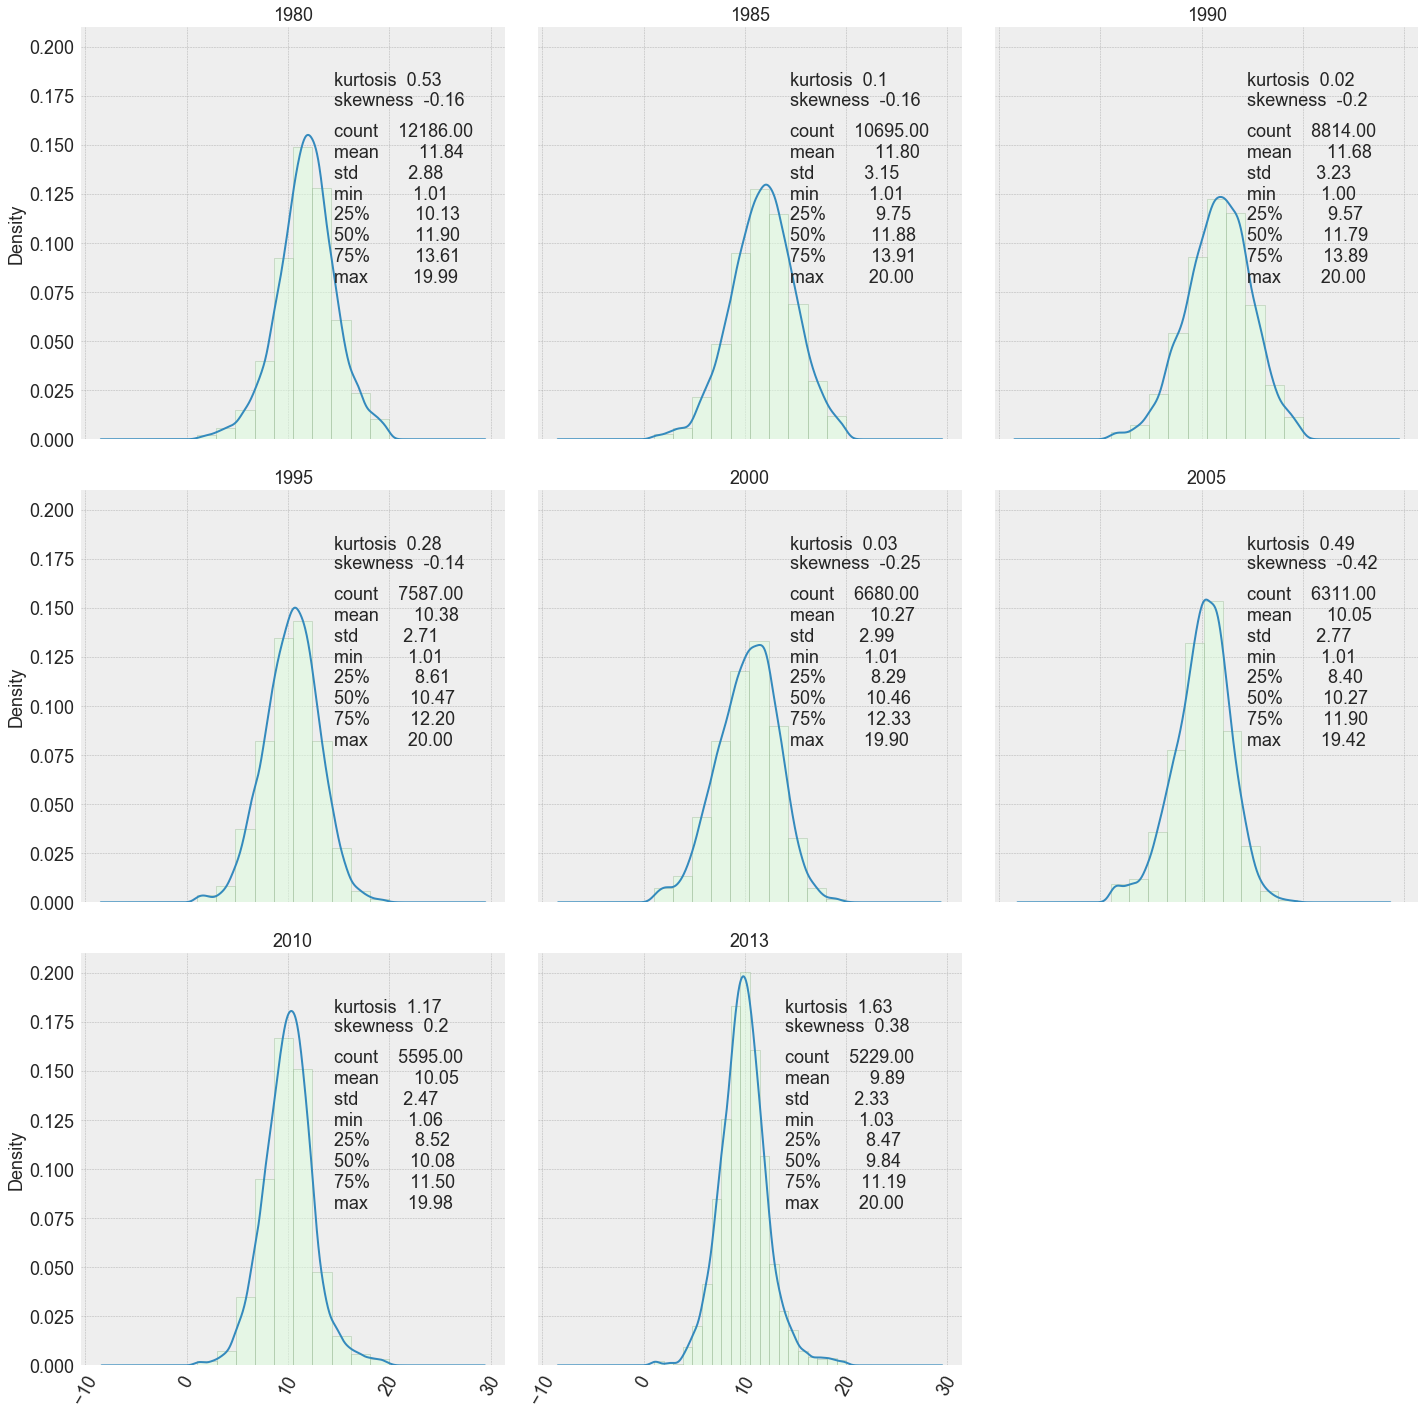

In [141]:
df = df_all.reset_index(level="year")
Q1 = df.leverageRatio.quantile(0.15)
Q3 = df.leverageRatio.quantile(0.85)
#print(df[df.leverageRatio>20])
#df = df[(df.leverageRatio > 0)]
#print(df)
fig, ax = plt.subplots(3, 3, figsize=(20,20), sharey=True, sharex=True)
ax = ax.ravel() 
year=1980
x = 0
temp_df = pd.DataFrame()
for x in range(7):
    temp_df = boxplot_df[boxplot_df.year==year]
    #print(temp_df)
    #temp_df.leverageRatio = temp_df.leverageRatio ** (1/3)
    #temp_df.leverageRatio = normalize(temp_df.leverageRatio)
    n, bins, patches = ax[x].hist(temp_df.leverageRatio,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
    temp_df.leverageRatio.plot.kde(ax=ax[x])
    
    ax[x].set_title(year)
    ax[x].text(14.5,0.08,temp_df.leverageRatio.describe().round(2).to_string())
    
    skew_value = temp_df.leverageRatio.skew().round(2)
    skew_value = "skewness  " + str(skew_value)
    ax[x].text(14.5, 0.17, skew_value)
    
    kurtosis_value = temp_df.leverageRatio.kurtosis().round(2)
    kurtosis_value = "kurtosis  " + str(kurtosis_value)
    ax[x].text(14.5, 0.18, kurtosis_value)
    
    
    
    #ax[x].text(16.5,0.175, "Mean: " + str(round(temp_df.leverageRatio.mean(),2)))
    #ax[x].text(17,0.165, "Median: " + str(temp_df.leverageRatio.median()))
    for tick in ax[x].get_xticklabels():
        tick.set_rotation(60)
    #print(bins)
    #ax[x].set_xticklabels(bins, rotation=60)
    year = year + 5

year = year - 2
temp_df = boxplot_df[boxplot_df.year==year]
n, bins, patches = ax[7].hist(temp_df.leverageRatio, bins=20 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
temp_df.leverageRatio.plot.kde(ax=ax[7])
for tick in ax[7].get_xticklabels():
        tick.set_rotation(60)
ax[7].set_title(year)
#ax[1].text(1,1, temp_df.leverageRatio.mean())
#ax[7].set(xticks=bins)
ax[7].text(14,0.08,temp_df.leverageRatio.describe().round(2).to_string())

skew_value = temp_df.leverageRatio.skew().round(2)
skew_value = "skewness  " + str(skew_value)
ax[7].text(14, 0.17, skew_value)
    
kurtosis_value = temp_df.leverageRatio.kurtosis().round(2)
kurtosis_value = "kurtosis  " + str(kurtosis_value)
ax[7].text(14, 0.18, kurtosis_value)
   

fig.delaxes(ax[8])
#fig.suptitle('Categorical Plotting')
#plt.subplots_adjust(left=0.1, bottom=0.02, right=0.75)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/LeverageDistribution_LeverageRatio_8013.png')


Boxplot graph

[Text(0, 0, '1976.0'),
 Text(0, 0, '1977.0'),
 Text(0, 0, '1978.0'),
 Text(0, 0, '1979.0'),
 Text(0, 0, '1980.0'),
 Text(0, 0, '1981.0'),
 Text(0, 0, '1982.0'),
 Text(0, 0, '1983.0'),
 Text(0, 0, '1984.0'),
 Text(0, 0, '1985.0'),
 Text(0, 0, '1986.0'),
 Text(0, 0, '1987.0'),
 Text(0, 0, '1988.0'),
 Text(0, 0, '1989.0'),
 Text(0, 0, '1990.0'),
 Text(0, 0, '1991.0'),
 Text(0, 0, '1992.0'),
 Text(0, 0, '1993.0'),
 Text(0, 0, '1994.0'),
 Text(0, 0, '1995.0'),
 Text(0, 0, '1996.0'),
 Text(0, 0, '1997.0'),
 Text(0, 0, '1998.0'),
 Text(0, 0, '1999.0'),
 Text(0, 0, '2000.0'),
 Text(0, 0, '2001.0'),
 Text(0, 0, '2002.0'),
 Text(0, 0, '2003.0'),
 Text(0, 0, '2004.0'),
 Text(0, 0, '2005.0'),
 Text(0, 0, '2006.0'),
 Text(0, 0, '2007.0'),
 Text(0, 0, '2008.0'),
 Text(0, 0, '2009.0'),
 Text(0, 0, '2010.0'),
 Text(0, 0, '2011.0'),
 Text(0, 0, '2012.0'),
 Text(0, 0, '2013.0')]

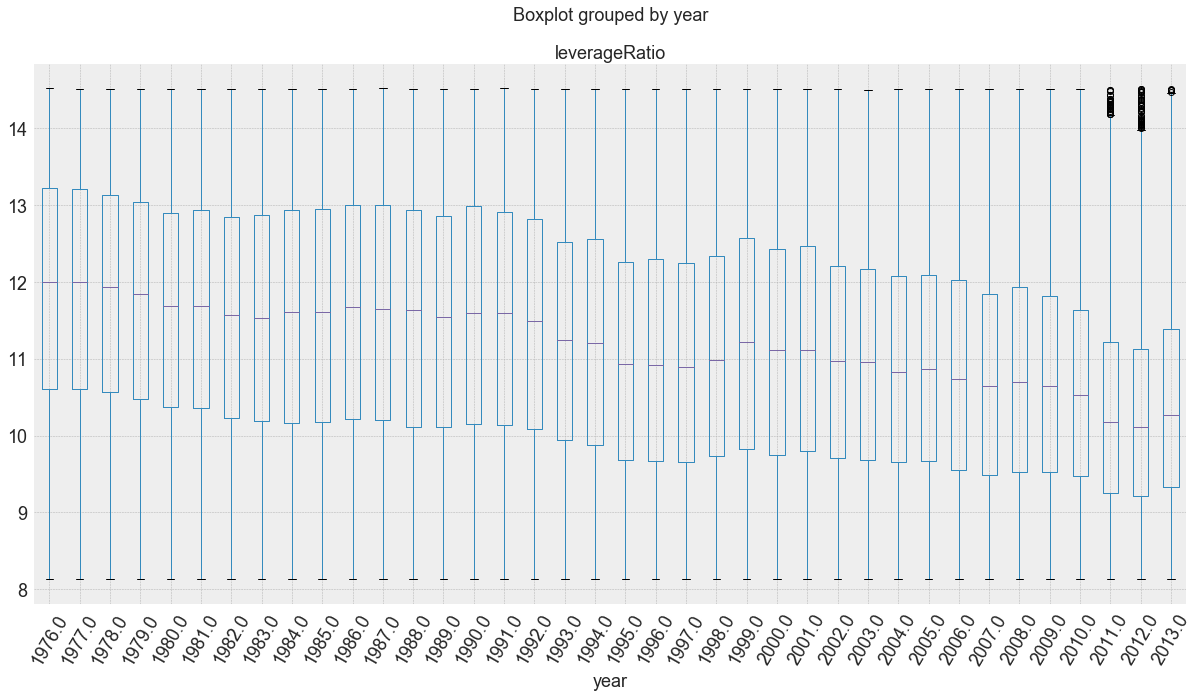

In [120]:
#boxplot_data = df_IQS.groupby("year").leverageRatio.describe().T
#df.describe()
#boxplot_data = df.groupby("year")["leverageRatio"]

fig, ax = plt.subplots(figsize=(20,10))

df_IQS.boxplot(ax=ax,by="year", column=["leverageRatio"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

In [121]:
df_IQS


,year,assets,equity,leverageRatio
rssdid,,,,
128146.0,1976.0,11559.0,1049.0,11.019066
128146.0,1977.0,14624.0,1177.0,12.424809
128146.0,1978.0,15926.0,1255.0,12.690040
128146.0,1979.0,17770.0,1341.0,13.251305
128146.0,1980.0,18864.0,1413.0,13.350318
...,...,...,...,...
4165907.0,2012.0,107598.0,11194.0,9.612114
4184186.0,2010.0,1383764.0,143739.0,9.626921
4184186.0,2011.0,1261384.0,133613.0,9.440578


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2897: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


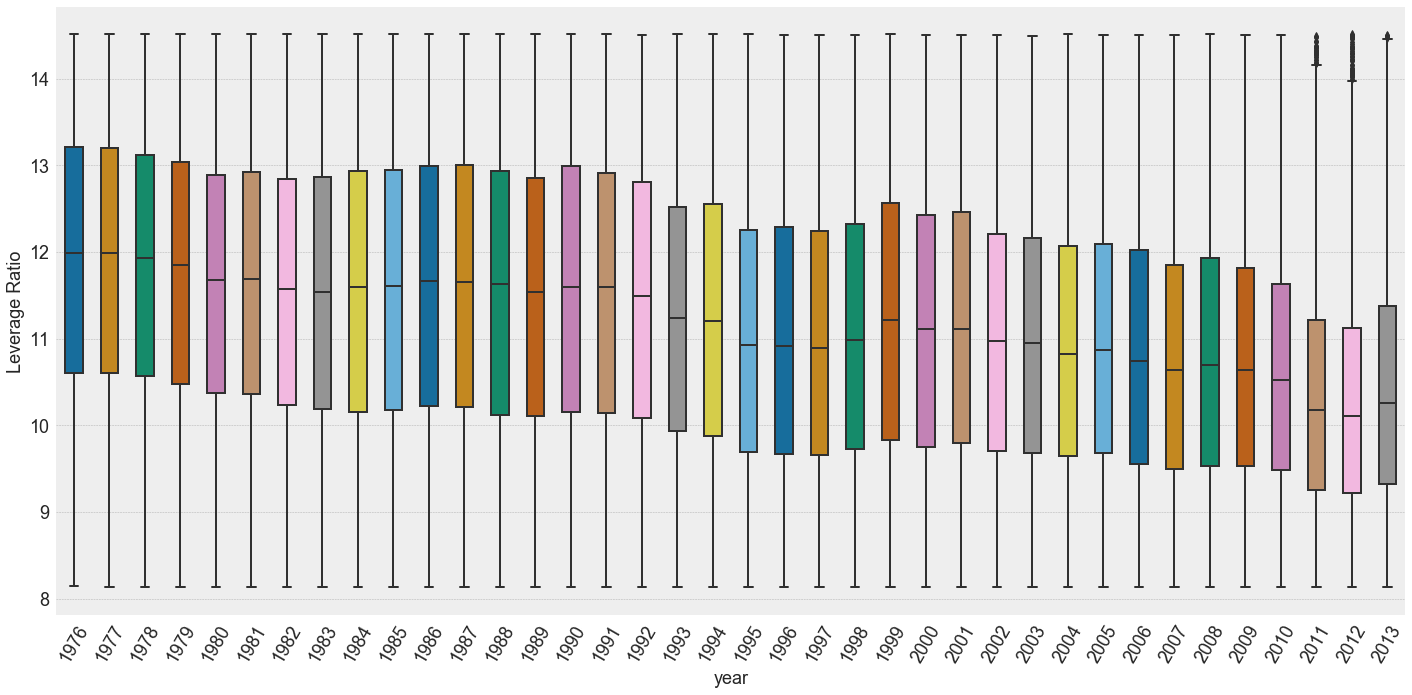

In [142]:
temp_df = df_IQS[df_IQS.year >= 1976]

temp_df.year = temp_df.year.astype(int)

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
# plot boxplot with seaborn
bplot=sns.boxplot(ax=ax,x=temp_df["year"], y=temp_df["leverageRatio"], 
                 width=0.5,
                 palette="colorblind")
ax.set_ylabel("Leverage Ratio")
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/LeverageDistribution_LeverageRatioBoxplot_7613.png')


In [123]:

#sns.boxplot( x=df_IQS["leverageRatio"], y=df_IQS["year"] )



Histograms of Leverage Ratio from 2003-2011 for quarter 4. 

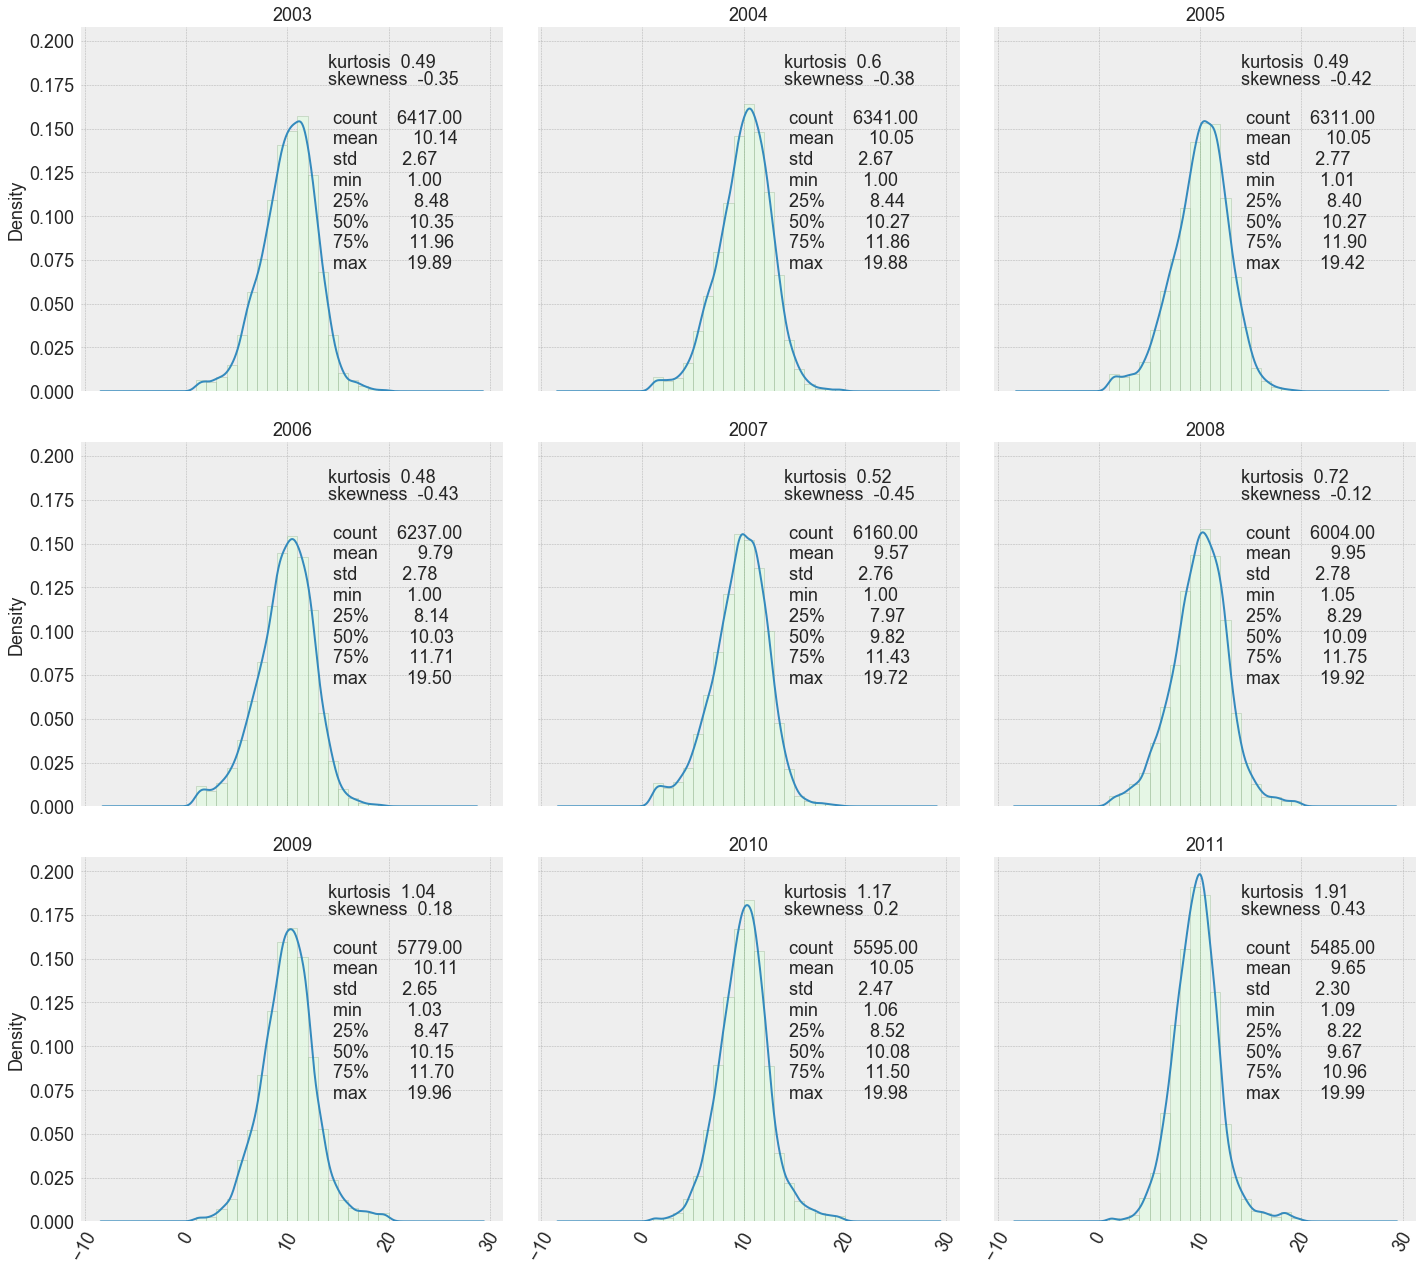

In [143]:
df = df_all.reset_index(level="year")
#df = df[(df.leverageRatio < 20) & (df.leverageRatio > 0)]
#print(df)
fig, ax = plt.subplots(3, 3, figsize=(20,18), sharey=True, sharex=True)
plt.title("Leverage Ratio Distribution (Asset/Equity)")
ax = ax.ravel() 
year=2003
x = 1
temp_df = pd.DataFrame()
#temp_df = df[df.year==2003]
#n, bins, patches = ax[0].hist(temp_df.leverageRatio, bins=20 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
#for tick in ax[0].get_xticklabels():
#    tick.set_rotation(60)
#ax[0].set_title(year)
#ax[0].set(xticks=bins)
for x in range(0,9):
    temp_df = boxplot_df[boxplot_df.year==year]
    #print(temp_df)
    n, bins1, patches = ax[x].hist(temp_df.leverageRatio, bins=20, range=(0,20) ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
    temp_df.leverageRatio.plot.kde(ax=ax[x])
    ax[x].set_title(year)
    ax[x].text(14.5,0.07,temp_df.leverageRatio.describe().round(2).to_string())
    #ax[x].set(xticks=bins1)
    for tick in ax[x].get_xticklabels():
        tick.set_rotation(60)
    
    skew_value = temp_df.leverageRatio.skew().round(2)
    skew_value = "skewness  " + str(skew_value)
    ax[x].text(14, 0.175, skew_value)
    
    kurtosis_value = temp_df.leverageRatio.kurtosis().round(2)
    kurtosis_value = "kurtosis  " + str(kurtosis_value)
    ax[x].text(14, 0.185, kurtosis_value)
    
    
    
    #print(bins)
    #ax[x].set_xticklabels(bins, rotation=60)
    year = year + 1
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/LeverageDistribution_LeverageRatio_0311.png')

Average leverage per year for quarter 4.

Datasets for top 0.1%, 1%, 5%, 50%

In [125]:
df

,year,assets,equity,leverageRatio
rssdid,,,,
128146.0,1976.0,11559.0,1049.0,11.019066
128146.0,1977.0,14624.0,1177.0,12.424809
128146.0,1978.0,15926.0,1255.0,12.690040
128146.0,1979.0,17770.0,1341.0,13.251305
128146.0,1980.0,18864.0,1413.0,13.350318
...,...,...,...,...
4262543.0,2011.0,854235.0,172534.0,4.951111
4262543.0,2012.0,777842.0,173092.0,4.493807
4262543.0,2013.0,808999.0,168617.0,4.797850


In [1]:
'''
year = 1976

topOnePercent = pd.DataFrame()
topFivePercent = pd.DataFrame()
topTenPercent = pd.DataFrame()
topFiftyPercent = pd.DataFrame()

for i in range(38):
    quarter=1
    temp_df_year = df[df.year==year]
    #print(year)
    
    for j in range(4):
        #print(quarter)
        temp_df = temp_df_year[temp_df_year.quarter==quarter]
        temp_df = temp_df.sort_values(by=["assets"], ascending=False )
        #print(len(temp_df))
        onepercent = round(0.001*len(temp_df))
        fivepercent = round(0.01*len(temp_df))
        tenpercent = round(0.10*len(temp_df))
        fiftypercent = round(0.50*len(temp_df))
        #print(onepercent)
        temp_df_One = temp_df.iloc[:onepercent,:]
        temp_df_Five = temp_df.iloc[:fivepercent, :]
        temp_df_Ten = temp_df.iloc[:tenpercent, :]
        temp_df_Fifty = temp_df.iloc[:fiftypercent, :]
        topOnePercent = topOnePercent.append(temp_df_One)
        topFivePercent = topFivePercent.append(temp_df_Five)
        topTenPercent = topTenPercent.append(temp_df_Ten)
        topFiftyPercent = topFiftyPercent.append(temp_df_Fifty)
        quarter = quarter + 1
    
    year = year + 1
'''

'\nyear = 1976\n\ntopOnePercent = pd.DataFrame()\ntopFivePercent = pd.DataFrame()\ntopTenPercent = pd.DataFrame()\ntopFiftyPercent = pd.DataFrame()\n\nfor i in range(38):\n    quarter=1\n    temp_df_year = df[df.year==year]\n    #print(year)\n    \n    for j in range(4):\n        #print(quarter)\n        temp_df = temp_df_year[temp_df_year.quarter==quarter]\n        temp_df = temp_df.sort_values(by=["assets"], ascending=False )\n        #print(len(temp_df))\n        onepercent = round(0.001*len(temp_df))\n        fivepercent = round(0.01*len(temp_df))\n        tenpercent = round(0.10*len(temp_df))\n        fiftypercent = round(0.50*len(temp_df))\n        #print(onepercent)\n        temp_df_One = temp_df.iloc[:onepercent,:]\n        temp_df_Five = temp_df.iloc[:fivepercent, :]\n        temp_df_Ten = temp_df.iloc[:tenpercent, :]\n        temp_df_Fifty = temp_df.iloc[:fiftypercent, :]\n        topOnePercent = topOnePercent.append(temp_df_One)\n        topFivePercent = topFivePercent.appen

In [2]:
df_aggOnePercent = topOnePercent.groupby(["year", "quarter"]).sum()
df_aggFivePercent = topFivePercent.groupby(["year", "quarter"]).sum()
df_aggTenPercent = topTenPercent.groupby(["year", "quarter"]).sum()
df_aggFiftyPercent = topFiftyPercent.groupby(["year", "quarter"]).sum()

NameError: name 'topOnePercent' is not defined

In [ ]:
df_aggOnePercent

In [ ]:
df_years_mean = pd.DataFrame()

df_years_mean = df.groupby(["year"]).agg({"leverageRatio":"mean"})
#print(df)
df_years_mean.index = df_years_mean.index.astype(int)
fig, ax = plt.subplots(figsize=(15,5));
ax.set_xticks(df_years_mean.index)
ax.set_xticklabels(df_years_mean.index, rotation=60)
ax.set_xlabel("Year")
ax.set_title("Average Accounting Leverage")
ax.grid()
ax.plot(df_years_mean.leverageRatio,"g-")
ax.plot(df_years_mean.leverageRatio,"oy")
plt.tight_layout()
#plt.savefig('LatexVorlage/graphs/LeverageDistribution_LeverageRatio_7613.png')

Mean of top 10 banks vs mean of rest

In [ ]:

year = 1978
top10_array = []
rest_array = []
df = df_all.reset_index(level="year")
df_Top10AssetsPerYear = pd.DataFrame()
df_RestAssetsPerYear = pd.DataFrame()

df.drop(df[df.equity<=0].index, inplace=True) #drop rows with equity<0

for i in range(36):
    #Top10 berechnen
    temp_df = df[df.year==year]
    temp_df.sort_values("assets", ascending=False, inplace=True)
    df_top10 = temp_df.head(10)
    df_Top10AssetsPerYear = df_Top10AssetsPerYear.append(df_top10)
    df_top10_mean = df_top10.leverageRatio.mean()
    top10_array.append(df_top10_mean)
    
    #Rest berechnen
    df_rest = temp_df.iloc[10:,:]
    df_rest_mean = df_rest.leverageRatio.mean()
    rest_array.append(df_rest_mean)
    df_RestAssetsPerYear = df_RestAssetsPerYear.append(df_rest)
    year = year + 1

#print(top10_array)
#print(rest_array)

dic_final = { "top10leverage" : top10_array,
            "restleverage" : rest_array }
years = [str(year) for year in range(1978, 2014)]
df_final = pd.DataFrame(dic_final, index=years)

#print(df_final)


fig, ax = plt.subplots(figsize=(15,5));
#ax.set_xticks(df_years_mean.index)
ax.set_xticklabels(df_final.index, rotation=35)
ax.plot(df_final)
ax.legend(["top10leverage", "restleverage"])
ax.set_xlabel("Year")
ax.set_title("Leverage Top10 vs Rest")
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/LeverageDistribution_LeverageRatioTop10vsRest_7813.png')

Leverage analysis - years 2000-2013

In [ ]:
year = 1978
top10_array = []
rest_array = []
df = df_all.reset_index(level="year")
df

In [ ]:
df_Top10AssetsAgg = df_Top10AssetsPerYear.groupby("year").sum()
df_RestAssetsPerYearAgg = df_RestAssetsPerYear.groupby("year").sum()

df_Top10AssetsAgg["restAssets"] = df_RestAssetsPerYearAgg.assets

fig, ax = plt.subplots(figsize=(20,10))
df_Top10AssetsAgg.plot.area(ax=ax, y=["restAssets", "assets"] )
ax.set_title("Assets: Top10 Banks vs Rest")
ax.legend(["Rest Banks", "Top10 banks"])
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/LeverageDistribution_AssetsTop10vsRest_7813.png')


In [ ]:
df_Top10vsRest = df_Top10AssetsAgg.copy()
import matplotlib.ticker as mtick

In [ ]:
df_Top10vsRest["allAssets"] = df_Top10vsRest.assets + df_Top10vsRest.restAssets

df_Top10vsRest["shareTop10"] = df_Top10vsRest.assets/df_Top10vsRest.allAssets
df_Top10vsRestPerc = df_Top10vsRest.copy()
df_Top10vsRestPerc.shareTop10 = df_Top10vsRest.shareTop10*100
fig, ax = plt.subplots(figsize=(20,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Asset share of Top 10 Banks")
df_Top10vsRestPerc.plot(ax=ax, y=["shareTop10"])
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/LeverageDistribution_shareTop10_7813.png')